<a href="https://colab.research.google.com/github/BRAYAN142002/MineriaDeDatos-LimpiezayTransformacion/blob/main/TallerEjemplo_1_LimpiezayTransformacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from sklearn.preprocessing import OneHotEncoder


In [ ]:
# Esto te permite cargar archivos desde tu dispositivo local
uploaded = files.upload()

Saving empleados.csv to empleados.csv


In [ ]:
#cargar uploaded
uploaded

{'empleados.csv': b"EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,HOBBY,WEIGHT,EDUCATION,MARITAL_STATUS\r\n7839,KING,PRESIDENT,,17/11/1981,5000,,HIKING,70,MASTER'S DEGREE,MARRIED\r\n7698,BLAKE,MANAGER,7839,01/05/1981,2850,,READING,85,BACHELOR'S DEGREE,DIVORCED\r\n7782,CLARK,MANAGER,7839,09/06/1981,2450,,-,,BACHELOR'S DEGREE,MARRIED\r\n7566,JONES,MANAGER,7839,02/04/1981,2975,,READING,68,MASTER'S DEGREE,MARRIED\r\n7788,SCOTT,ANALYST,7566,19/04/1987,3000,,,,BACHELOR'S DEGREE,MARRIED\r\n7902,FORD,ANALYST,7566,03/12/1981,3000,,,,BACHELOR'S DEGREE,SINGLE\r\n7369,SMITH,CLERK,7902,17/12/1980,800,,,82,BACHELOR'S DEGREE,SINGLE\r\n7499,ALLEN,SALESMAN,7698,20/02/1981,1600,300,-,,HIGH SCHOOL,MARRIED\r\n7521,WARD,SALESMAN,7698,22/02/1981,1250,500,,,HIGH SCHOOL,MARRIED\r\n7654,MARTIN,SALESMAN,7698,28/09/1981,1250,1400,READING,120,BACHELOR'S DEGREE,MARRIED\r\n7844,TURNER,SALESMAN,7698,08/09/1981,1500,0,-,52,HIGH SCHOOL,MARRIED\r\n7876,ADAMS,CLERK,7788,23/05/1987,1100,,,87,BACHELOR'S DEGREE,SINGLE\r\n7900,JAME

In [ ]:
#cargar el dataframe con los datos del archivo
#df = pd.read_csv(io.StringIO(uploaded['empleados.csv'].decode('utf-8')))
url='/content/empleados.csv'
df=pd.read_csv(url)
df

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,HOBBY,WEIGHT,EDUCATION,MARITAL_STATUS
0,7839,KING,PRESIDENT,NaN,17/11/1981,5000,NaN,HIKING,70.0,MASTER'S DEGREE,MARRIED
1,7698,BLAKE,MANAGER,7839.0,01/05/1981,2850,NaN,READING,85.0,BACHELOR'S DEGREE,DIVORCED
2,7782,CLARK,MANAGER,7839.0,09/06/1981,2450,NaN,-,NaN,BACHELOR'S DEGREE,MARRIED
3,7566,JONES,MANAGER,7839.0,02/04/1981,2975,NaN,READING,68.0,MASTER'S DEGREE,MARRIED
4,7788,SCOTT,ANALYST,7566.0,19/04/1987,3000,NaN,NaN,NaN,BACHELOR'S DEGREE,MARRIED
5,7902,FORD,ANALYST,7566.0,03/12/1981,3000,NaN,NaN,NaN,BACHELOR'S DEGREE,SINGLE
6,7369,SMITH,CLERK,7902.0,17/12/1980,800,NaN,NaN,82.0,BACHELOR'S DEGREE,SINGLE
7,7499,ALLEN,SALESMAN,7698.0,20/02/1981,1600,300.0,-,NaN,HIGH SCHOOL,MARRIED
8,7521,WARD,SALESMAN,7698.0,22/02/1981,1250,500.0,NaN,NaN,HIGH SCHOOL,MARRIED
9,7654,MARTIN,SALESMAN,7698.0,28/09/1981,1250,1400.0,READING,120.0,BACHELOR'S DEGREE,MARRIED


In [ ]:
#Explore el dataframe creado
df

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,HOBBY,WEIGHT,EDUCATION,MARITAL_STATUS
0,7839,KING,PRESIDENT,NaN,17/11/1981,5000,NaN,HIKING,70.0,MASTER'S DEGREE,MARRIED
1,7698,BLAKE,MANAGER,7839.0,01/05/1981,2850,NaN,READING,85.0,BACHELOR'S DEGREE,DIVORCED
2,7782,CLARK,MANAGER,7839.0,09/06/1981,2450,NaN,-,NaN,BACHELOR'S DEGREE,MARRIED
3,7566,JONES,MANAGER,7839.0,02/04/1981,2975,NaN,READING,68.0,MASTER'S DEGREE,MARRIED
4,7788,SCOTT,ANALYST,7566.0,19/04/1987,3000,NaN,NaN,NaN,BACHELOR'S DEGREE,MARRIED
5,7902,FORD,ANALYST,7566.0,03/12/1981,3000,NaN,NaN,NaN,BACHELOR'S DEGREE,SINGLE
6,7369,SMITH,CLERK,7902.0,17/12/1980,800,NaN,NaN,82.0,BACHELOR'S DEGREE,SINGLE
7,7499,ALLEN,SALESMAN,7698.0,20/02/1981,1600,300.0,-,NaN,HIGH SCHOOL,MARRIED
8,7521,WARD,SALESMAN,7698.0,22/02/1981,1250,500.0,NaN,NaN,HIGH SCHOOL,MARRIED
9,7654,MARTIN,SALESMAN,7698.0,28/09/1981,1250,1400.0,READING,120.0,BACHELOR'S DEGREE,MARRIED


In [ ]:
#explore del dataframe las primeros 5 filas
df.head()

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,HOBBY,WEIGHT,EDUCATION,MARITAL_STATUS
0,7839,KING,PRESIDENT,NaN,17/11/1981,5000,NaN,HIKING,70.0,MASTER'S DEGREE,MARRIED
1,7698,BLAKE,MANAGER,7839.0,01/05/1981,2850,NaN,READING,85.0,BACHELOR'S DEGREE,DIVORCED
2,7782,CLARK,MANAGER,7839.0,09/06/1981,2450,NaN,-,NaN,BACHELOR'S DEGREE,MARRIED
3,7566,JONES,MANAGER,7839.0,02/04/1981,2975,NaN,READING,68.0,MASTER'S DEGREE,MARRIED
4,7788,SCOTT,ANALYST,7566.0,19/04/1987,3000,NaN,NaN,NaN,BACHELOR'S DEGREE,MARRIED


In [ ]:
#explore del dataframe las ultimas 5 filas
df.tail()

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,HOBBY,WEIGHT,EDUCATION,MARITAL_STATUS
9,7654,MARTIN,SALESMAN,7698.0,28/09/1981,1250,1400.0,READING,120.0,BACHELOR'S DEGREE,MARRIED
10,7844,TURNER,SALESMAN,7698.0,08/09/1981,1500,0.0,-,52.0,HIGH SCHOOL,MARRIED
11,7876,ADAMS,CLERK,7788.0,23/05/1987,1100,NaN,NaN,87.0,BACHELOR'S DEGREE,SINGLE
12,7900,JAMES,CLERK,7698.0,03/12/1981,950,NaN,NaN,NaN,BACHELOR'S DEGREE,DIVORCED
13,7934,MILLER,CLERK,7782.0,23/01/1982,1300,NaN,DANCING,66.0,BACHELOR'S DEGREE,SINGLE


In [ ]:
#explore el tamaño del  dataframe
df.shape

(14, 11)

In [ ]:
#Para obtener las variables numericas
var_numericas = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

In [ ]:
#imprimir las variables numericas
var_numericas

,EMPNO,MGR,SAL,COMM,WEIGHT
0,7839,NaN,5000,NaN,70.0
1,7698,7839.0,2850,NaN,85.0
2,7782,7839.0,2450,NaN,NaN
3,7566,7839.0,2975,NaN,68.0
4,7788,7566.0,3000,NaN,NaN
5,7902,7566.0,3000,NaN,NaN
6,7369,7902.0,800,NaN,82.0
7,7499,7698.0,1600,300.0,NaN
8,7521,7698.0,1250,500.0,NaN
9,7654,7698.0,1250,1400.0,120.0


In [ ]:
#cuales son exactamente las variables numericas
var_numericas.columns

Index(['EMPNO', 'MGR', 'SAL', 'COMM', 'WEIGHT'], dtype='object')

In [ ]:
#Para obtener las variables categoricas
var_categoricas = df.select_dtypes(include = ["object"])

In [ ]:
#imprimir las variables categoricas
var_categoricas

,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
0,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,CLARK,MANAGER,09/06/1981,-,BACHELOR'S DEGREE,MARRIED
3,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,SCOTT,ANALYST,19/04/1987,NaN,BACHELOR'S DEGREE,MARRIED
5,FORD,ANALYST,03/12/1981,NaN,BACHELOR'S DEGREE,SINGLE
6,SMITH,CLERK,17/12/1980,NaN,BACHELOR'S DEGREE,SINGLE
7,ALLEN,SALESMAN,20/02/1981,-,HIGH SCHOOL,MARRIED
8,WARD,SALESMAN,22/02/1981,NaN,HIGH SCHOOL,MARRIED
9,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#cuales son exactamente las variables categoricas
var_categoricas.columns

Index(['ENAME', 'JOB', 'HIREDATE', 'HOBBY', 'EDUCATION', 'MARITAL_STATUS'], dtype='object')

In [ ]:
#si se requiere crear una lista a partir de las variables numerica
numericas = list(var_numericas)

In [ ]:
#Consultar numericas
numericas

['EMPNO', 'MGR', 'SAL', 'COMM', 'WEIGHT']

In [ ]:
#si se requiere crear una lista a partir de las variables categoricas
categoricas = list(var_categoricas)

In [ ]:
print(categoricas)

['ENAME', 'JOB', 'HIREDATE', 'HOBBY', 'EDUCATION', 'MARITAL_STATUS']


In [ ]:
#Si se quisiera cambiar el  dataframe a partir de la union de esas listas
df = df[numericas + categoricas]

In [ ]:
#para detectar valores nulos en el dataframe
df.isnull()

,EMPNO,MGR,SAL,COMM,WEIGHT,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
0,False,True,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,True,False,False
5,False,False,False,True,True,False,False,False,True,False,False
6,False,False,False,True,False,False,False,False,True,False,False
7,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,True,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#para se quiere sumar los nulos que hay en cada columna
df.isnull().sum()

,0
EMPNO,0
MGR,1
SAL,0
COMM,10
WEIGHT,6
ENAME,0
JOB,0
HIREDATE,0
HOBBY,6
EDUCATION,0


In [ ]:
#para se quiere sumar los nulos que hay en cada columna en orden descendente o de mayor a menor
df.isnull().sum().sort_values(ascending = False)

,0
COMM,10
WEIGHT,6
HOBBY,6
MGR,1
EMPNO,0
SAL,0
ENAME,0
JOB,0
HIREDATE,0
EDUCATION,0


In [ ]:
df

,EMPNO,MGR,SAL,COMM,WEIGHT,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
0,7839,NaN,5000,NaN,70.0,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,7698,7839.0,2850,NaN,85.0,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,7782,7839.0,2450,NaN,NaN,CLARK,MANAGER,09/06/1981,-,BACHELOR'S DEGREE,MARRIED
3,7566,7839.0,2975,NaN,68.0,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,7788,7566.0,3000,NaN,NaN,SCOTT,ANALYST,19/04/1987,NaN,BACHELOR'S DEGREE,MARRIED
5,7902,7566.0,3000,NaN,NaN,FORD,ANALYST,03/12/1981,NaN,BACHELOR'S DEGREE,SINGLE
6,7369,7902.0,800,NaN,82.0,SMITH,CLERK,17/12/1980,NaN,BACHELOR'S DEGREE,SINGLE
7,7499,7698.0,1600,300.0,NaN,ALLEN,SALESMAN,20/02/1981,-,HIGH SCHOOL,MARRIED
8,7521,7698.0,1250,500.0,NaN,WARD,SALESMAN,22/02/1981,NaN,HIGH SCHOOL,MARRIED
9,7654,7698.0,1250,1400.0,120.0,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#EJERCICIOS DE LIMPIEZA Y TRANSFORMACION DE DATOS


In [ ]:
#Para borrar columnas especificas
df=df.drop(columns=['MGR','EMPNO'])

In [ ]:
#MANEJO DE DATOS NULOS

In [ ]:
#Opción1: Para borrar las filas qie tienen nulos
df.dropna()

,SAL,COMM,WEIGHT,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
9,1250,1400.0,120.0,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED
10,1500,0.0,52.0,TURNER,SALESMAN,08/09/1981,-,HIGH SCHOOL,MARRIED


In [ ]:
#Opción 2: Para borrar las columnas  que tienen nulos
df.dropna(axis=1)

,SAL,ENAME,JOB,HIREDATE,EDUCATION,MARITAL_STATUS
0,5000,KING,PRESIDENT,17/11/1981,MASTER'S DEGREE,MARRIED
1,2850,BLAKE,MANAGER,01/05/1981,BACHELOR'S DEGREE,DIVORCED
2,2450,CLARK,MANAGER,09/06/1981,BACHELOR'S DEGREE,MARRIED
3,2975,JONES,MANAGER,02/04/1981,MASTER'S DEGREE,MARRIED
4,3000,SCOTT,ANALYST,19/04/1987,BACHELOR'S DEGREE,MARRIED
5,3000,FORD,ANALYST,03/12/1981,BACHELOR'S DEGREE,SINGLE
6,800,SMITH,CLERK,17/12/1980,BACHELOR'S DEGREE,SINGLE
7,1600,ALLEN,SALESMAN,20/02/1981,HIGH SCHOOL,MARRIED
8,1250,WARD,SALESMAN,22/02/1981,HIGH SCHOOL,MARRIED
9,1250,MARTIN,SALESMAN,28/09/1981,BACHELOR'S DEGREE,MARRIED


In [ ]:
#opcion 3 remplazar los nulos con los valores anterior y posterior
#forward fill:los nulos se rellena con el anterior valor No NULO ffill()
df['COMM'].ffill()

,COMM
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,300.0
8,500.0
9,1400.0


In [ ]:
df['COMM'].bfill()

,COMM
0,300.0
1,300.0
2,300.0
3,300.0
4,300.0
5,300.0
6,300.0
7,300.0
8,500.0
9,1400.0


In [ ]:
#opcion 4 imputacion simple
#imputar con un valor puntual(le colocamos cero al los valores nulos de la columna COMM)
df['COMM']=df['COMM'].fillna(value=0)

In [ ]:
df

,SAL,COMM,WEIGHT,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
0,5000,0.0,70.0,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.0,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,NaN,CLARK,MANAGER,09/06/1981,-,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.0,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,NaN,SCOTT,ANALYST,19/04/1987,NaN,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,NaN,FORD,ANALYST,03/12/1981,NaN,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.0,SMITH,CLERK,17/12/1980,NaN,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,NaN,ALLEN,SALESMAN,20/02/1981,-,HIGH SCHOOL,MARRIED
8,1250,500.0,NaN,WARD,SALESMAN,22/02/1981,NaN,HIGH SCHOOL,MARRIED
9,1250,1400.0,120.0,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#imputacion a partir de la media(debo ignorar los nulos porque no puedo operar con nulos)
promedio=df['WEIGHT'].mean()

In [ ]:
promedio

78.75

In [ ]:
#guardamos de el dataframe el promedio en los que tiene nulos
df['WEIGHT']=df['WEIGHT'].fillna(promedio)

In [ ]:
df


,SAL,COMM,WEIGHT,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
0,5000,0.0,70.00,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.00,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,78.75,CLARK,MANAGER,09/06/1981,-,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.00,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,78.75,SCOTT,ANALYST,19/04/1987,NaN,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,78.75,FORD,ANALYST,03/12/1981,NaN,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.00,SMITH,CLERK,17/12/1980,NaN,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,78.75,ALLEN,SALESMAN,20/02/1981,-,HIGH SCHOOL,MARRIED
8,1250,500.0,78.75,WARD,SALESMAN,22/02/1981,NaN,HIGH SCHOOL,MARRIED
9,1250,1400.0,120.00,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
df['HOBBY']=df['HOBBY'].fillna('NOHOBBY')

In [ ]:
df

,SAL,COMM,WEIGHT,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
0,5000,0.0,70.00,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.00,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,78.75,CLARK,MANAGER,09/06/1981,-,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.00,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,78.75,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,78.75,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.00,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,78.75,ALLEN,SALESMAN,20/02/1981,-,HIGH SCHOOL,MARRIED
8,1250,500.0,78.75,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
9,1250,1400.0,120.00,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#aqui definimos un diccionaio para cambiar este caracter '-'
mapeo_hobby={'-':'NOHOBBY'}

In [ ]:
#
df['HOBBY']=df['HOBBY'].replace(mapeo_hobby)

In [ ]:
df

,SAL,COMM,WEIGHT,ENAME,JOB,HIREDATE,HOBBY,EDUCATION,MARITAL_STATUS
0,5000,0.0,70.00,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.00,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,78.75,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.00,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,78.75,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,78.75,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.00,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,78.75,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
8,1250,500.0,78.75,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
9,1250,1400.0,120.00,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
df=df.rename(columns={'ENAME':'NOMBRE','JOB':'CARGO','HIREDATE':'FECHA_INGRESO','SAL':'SALARIO','COMM':'COMISION','HOBBY':'PASATIEMPO','EDUCATION':'EDUCACION','MARITAL_STATUS':'ESTADO_CIVIL','WEIGHT':'PESO'})

In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,ESTADO_CIVIL
0,5000,0.0,70.00,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.00,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,78.75,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.00,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,78.75,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,78.75,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.00,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,78.75,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
8,1250,500.0,78.75,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
9,1250,1400.0,120.00,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#manejo de datos atipicos
#calcular Q1, Q2, Mediana,IQR, Li,Ls
Q1=df['PESO'].quantile(0.25)
Q2=df['PESO'].quantile(0.50)
Q3=df['PESO'].quantile(0.75)
IQR=Q3-Q1
Li=Q1-1.5*IQR
Ls=Q3+1.5*IQR


In [ ]:
print(Q1)
print(Q2)
print(Q3)
print(IQR)
print(Li)
print(Ls)


72.1875
78.75
81.1875
9.0
58.6875
94.6875


In [ ]:
from IPython.display import Markdown as md


In [ ]:
md("### Q1 es igual a {}, Q3 es igual a {}, IQR es igual a {}, limite inferior es igua a {}, limite superior es igual a {}".format(Q1,Q3,IQR,Li,Ls))

### Q1 es igual a 72.1875, Q3 es igual a 81.1875, IQR es igual a 9.0, limite inferior es igua a 58.6875, limite superior es igual a 94.6875

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot de la variable PESO')

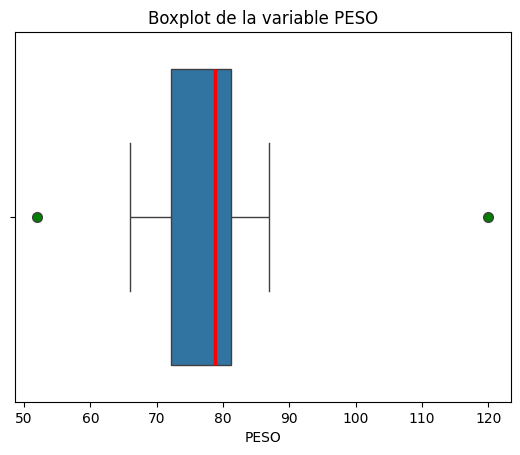

In [ ]:
flierprops=dict(marker='o',markerfacecolor='green',markersize=7,linestyle='none')
medianprops=dict(linestyle='-',linewidth=2.5,color='red')
sns.boxplot(x=df['PESO'],fliersize = 5,fill=True,flierprops=flierprops,medianprops=medianprops)
plt.title("Boxplot de la variable PESO")

In [ ]:
df['PESO']=df['PESO'].map(lambda x:Li if x < Li else Ls if x > Ls else x)

In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,ESTADO_CIVIL
0,5000,0.0,70.0000,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.0000,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,78.7500,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.0000,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,78.7500,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,78.7500,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.0000,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,78.7500,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
8,1250,500.0,78.7500,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
9,1250,1400.0,94.6875,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#TRANSFORMACION DE LOS DATOS
#CODIFICACION DE VARIABLES CATEGORICAS
#TECNICA 1: CODIFICACION DE ETIQUERAS O LABEL ENCODING
#ES LA FORMA MAS SENCILLA DE DAR U VLAOR NUMERICO A UNA VARIABLE CATEGORICA PERO NO SIRVE PARA ORDINALES

from sklearn.preprocessing import LabelEncoder

In [ ]:
#POR SI SE QUIERE SABER CUANTOS VALORES HAY EN CADA CATEGORIA DE EDUCACION
df['EDUCACION'].value_counts()


,count
EDUCACION,
BACHELOR'S DEGREE,9
HIGH SCHOOL,3
MASTER'S DEGREE,2


In [ ]:
#CREAR UN ENCODER:(una instancia de LabelEncoder)
encoder=LabelEncoder()


In [ ]:
df['EDUCACION_ENCODED']=encoder.fit_transform(df['EDUCACION'])

In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,ESTADO_CIVIL,EDUCACION_ENCODED
0,5000,0.0,70.0000,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED,2
1,2850,0.0,85.0000,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED,0
2,2450,0.0,78.7500,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED,0
3,2975,0.0,68.0000,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED,2
4,3000,0.0,78.7500,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED,0
5,3000,0.0,78.7500,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE,0
6,800,0.0,82.0000,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE,0
7,1600,300.0,78.7500,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED,1
8,1250,500.0,78.7500,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED,1
9,1250,1400.0,94.6875,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED,0


In [ ]:
df=df.drop(columns=['EDUCACION_ENCODED'])

In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,ESTADO_CIVIL
0,5000,0.0,70.0000,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.0000,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,78.7500,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.0000,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,78.7500,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,78.7500,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.0000,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,78.7500,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
8,1250,500.0,78.7500,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
9,1250,1400.0,94.6875,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#para hacer transformacion de categoricos a ordinales
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#crear un codificar indicacole el orden de las variables
encoder = OrdinalEncoder(categories=[["PRESCHOOL", "HIGH SCHOOL", "BACHELOR'S DEGREE", "MASTER'S DEGREE", "DOCTORATE"]])

In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,ESTADO_CIVIL
0,5000,0.0,70.0000,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED
1,2850,0.0,85.0000,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED
2,2450,0.0,78.7500,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED
3,2975,0.0,68.0000,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED
4,3000,0.0,78.7500,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED
5,3000,0.0,78.7500,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE
6,800,0.0,82.0000,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE
7,1600,300.0,78.7500,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
8,1250,500.0,78.7500,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED
9,1250,1400.0,94.6875,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED


In [ ]:
#AJUSTA EL ENCODER O CODIFICADOR CON LA VARIABLE EDUCCION Y SE TRANSFORMA
#df['EDUCACION_ENCODER']=encoder.fit_transform(df['EDUCACION'])
df['EDUCACION_ENCODED'] = encoder.fit_transform(df[['EDUCACION']])
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,ESTADO_CIVIL,EDUCACION_ENCODED
0,5000,0.0,70.0000,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED,3.0
1,2850,0.0,85.0000,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED,2.0
2,2450,0.0,78.7500,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED,2.0
3,2975,0.0,68.0000,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED,3.0
4,3000,0.0,78.7500,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED,2.0
5,3000,0.0,78.7500,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE,2.0
6,800,0.0,82.0000,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE,2.0
7,1600,300.0,78.7500,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED,1.0
8,1250,500.0,78.7500,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED,1.0
9,1250,1400.0,94.6875,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED,2.0


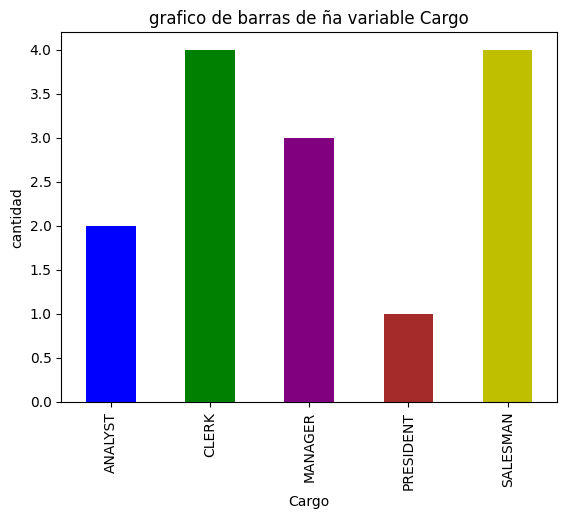

In [ ]:
#VISUALIZAR COLUMNA CARGO
grupos_cargo=df['CARGO'].value_counts().sort_index()
grupos_cargo.plot(kind='bar',color=('blue','g','purple','brown','y'))
plt.title('grafico de barras de ña variable Cargo')
plt.xlabel('Cargo')
plt.ylabel('cantidad')
plt.show()

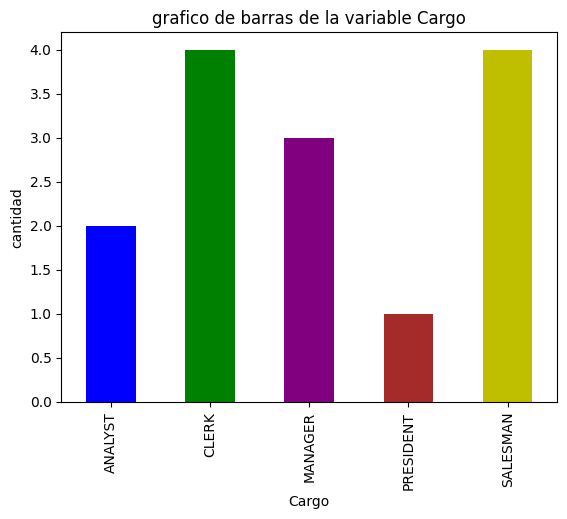

In [ ]:
df.groupby('CARGO').size().plot(kind='bar',color=('blue','g','purple','brown','y'))
plt.title('grafico de barras de la variable Cargo')
plt.xlabel('Cargo')
plt.ylabel('cantidad')
plt.show()

Text(0.5, 1.0, 'grafico de pastel de la variable Pasatiempo')

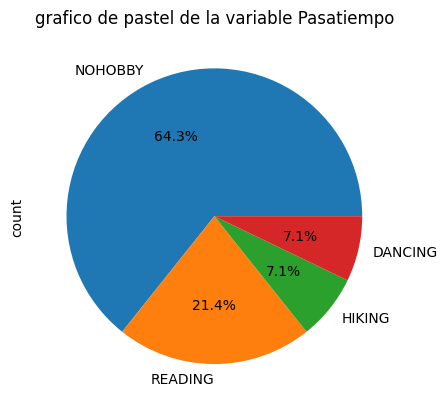

In [ ]:
#graficar en pastel al columna pasatiempo con porcentajes
df['PASATIEMPO'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('grafico de pastel de la variable Pasatiempo')

In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,ESTADO_CIVIL,EDUCACION_ENCODED
0,5000,0.0,70.0000,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,MARRIED,3.0
1,2850,0.0,85.0000,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,DIVORCED,2.0
2,2450,0.0,78.7500,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,MARRIED,2.0
3,2975,0.0,68.0000,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,MARRIED,3.0
4,3000,0.0,78.7500,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,MARRIED,2.0
5,3000,0.0,78.7500,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,SINGLE,2.0
6,800,0.0,82.0000,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,SINGLE,2.0
7,1600,300.0,78.7500,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED,1.0
8,1250,500.0,78.7500,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,MARRIED,1.0
9,1250,1400.0,94.6875,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,MARRIED,2.0


In [ ]:
#graficar la relacion entre cargo y estado civil
conteo_cargo_estado_civil=df.groupby(['CARGO','ESTADO_CIVIL']).size().unstack(fill_value=0)
print(conteo_cargo_estado_civil)

ESTADO_CIVIL  DIVORCED  MARRIED  SINGLE
CARGO                                  
ANALYST              0        1       1
CLERK                1        0       3
MANAGER              1        2       0
PRESIDENT            0        1       0
SALESMAN             0        4       0


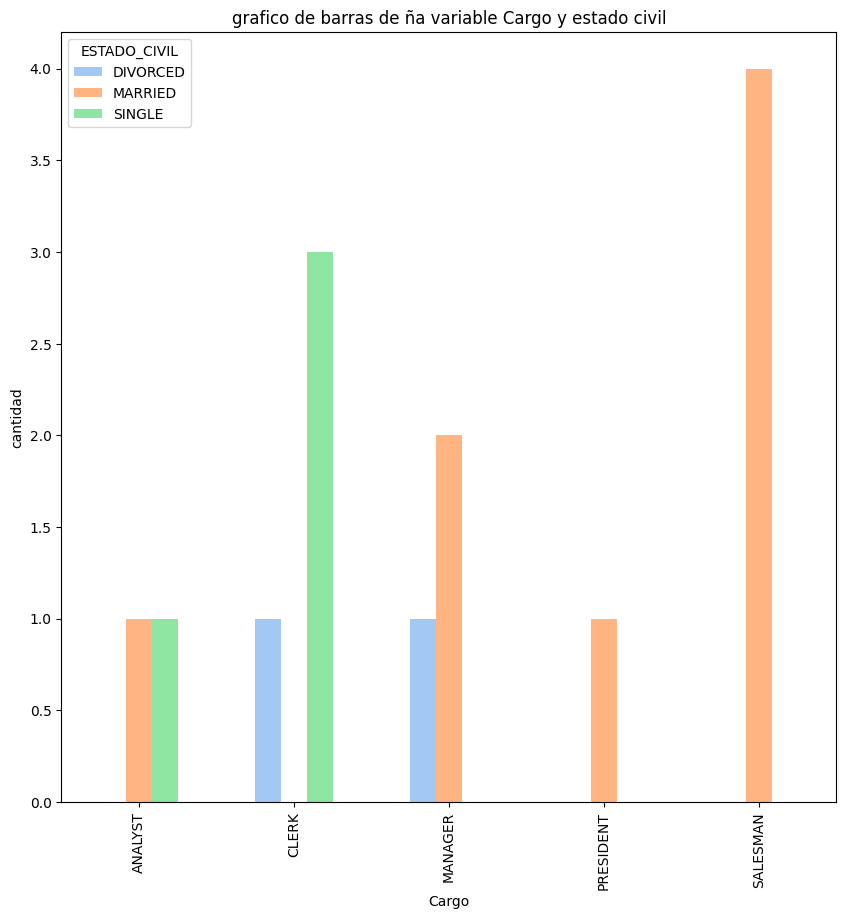

In [ ]:
conteo_cargo_estado_civil.plot(kind='bar',figsize=(10,10),color=sns.color_palette("pastel"))
plt.title('grafico de barras de ña variable Cargo y estado civil')
plt.xlabel('Cargo')
plt.ylabel('cantidad')
plt.show()

In [ ]:
#tecnica de transformacion one-hot encoder(codificacion en caliente) para cambiar categoricos a binario
#transformacion usando pandas get_dummies
df=pd.get_dummies(df,columns=['ESTADO_CIVIL'],dtype=int,drop_first=True)


In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION,EDUCACION_ENCODED,ESTADO_CIVIL_MARRIED,ESTADO_CIVIL_SINGLE
0,5000,0.0,70.0000,KING,PRESIDENT,17/11/1981,HIKING,MASTER'S DEGREE,3.0,1,0
1,2850,0.0,85.0000,BLAKE,MANAGER,01/05/1981,READING,BACHELOR'S DEGREE,2.0,0,0
2,2450,0.0,78.7500,CLARK,MANAGER,09/06/1981,NOHOBBY,BACHELOR'S DEGREE,2.0,1,0
3,2975,0.0,68.0000,JONES,MANAGER,02/04/1981,READING,MASTER'S DEGREE,3.0,1,0
4,3000,0.0,78.7500,SCOTT,ANALYST,19/04/1987,NOHOBBY,BACHELOR'S DEGREE,2.0,1,0
5,3000,0.0,78.7500,FORD,ANALYST,03/12/1981,NOHOBBY,BACHELOR'S DEGREE,2.0,0,1
6,800,0.0,82.0000,SMITH,CLERK,17/12/1980,NOHOBBY,BACHELOR'S DEGREE,2.0,0,1
7,1600,300.0,78.7500,ALLEN,SALESMAN,20/02/1981,NOHOBBY,HIGH SCHOOL,1.0,1,0
8,1250,500.0,78.7500,WARD,SALESMAN,22/02/1981,NOHOBBY,HIGH SCHOOL,1.0,1,0
9,1250,1400.0,94.6875,MARTIN,SALESMAN,28/09/1981,READING,BACHELOR'S DEGREE,2.0,1,0


In [ ]:
#Transformacion usando sklearn
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#tranformacion usanod sklearn
#crear un encoder
encoder=OneHotEncoder()
#se hace un fotting del encoder es decir un "ajuste" o se adapta el encoder a los datos
data = encoder.fit_transform(df[['EDUCACION']]).toarray()
print(data)

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
#para conocer las categorias
encoder.categories_

[array(["BACHELOR'S DEGREE", 'HIGH SCHOOL', "MASTER'S DEGREE"],
       dtype=object)]

In [ ]:
#opcion 1:crear un dataframe con esas columnas
df_onehot=pd.DataFrame(data,columns=encoder.categories_[0])
df_onehot.astype(int)


,BACHELOR'S DEGREE,HIGH SCHOOL,MASTER'S DEGREE
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
6,1,0,0
7,0,1,0
8,0,1,0
9,1,0,0


In [ ]:
#adicionar al viejo dataframe este nuevo datframe
df=pd.concat([df,df_onehot],axis=1)

In [ ]:
#borrar la columna educacion de las generadas por one_hot
df=df.drop(columns=['EDUCACION',"BACHELOR'S DEGREE"])

In [ ]:
#FPRMATEAR PPARA QUE ME QUEDEN ENTEROS
df['HIGH SCHOOL']=df['HIGH SCHOOL'].astype(int)
df["MASTER'S DEGREE"]=df["MASTER'S DEGREE"].astype(int)

In [ ]:
#CONSULTAR QUE TIPO DE DATO ES FECHA INGRESO
df['FECHA_INGRESO'].dtype


dtype('O')

In [ ]:
#convertir la columna fecha ingreso a datetime
#dayfirst=True: si es true parsea la fecha con el dia primero ejemplo:"10/11/12" es parseada a 2012-11-10
#yearfirst=True: parsea la fecha con el año de primero ejemplo 10/11/12 se parsea a: 2010/11/12
#errors='coerce' fija la fecha en Nat
#errors='raise'  lanza en exception
#errors='ignore' retorna la entrada
df['FECHA_INGRESO']=pd.to_datetime(df['FECHA_INGRESO'],dayfirst=True,errors='coerce')

In [ ]:
#generar las colmnas de MES Y ANIO
df['MES']=df['FECHA_INGRESO'].dt.month.astype
df['ANIO']=df['FECHA_INGRESO'].dt.year

In [ ]:
df

,SALARIO,COMISION,PESO,NOMBRE,CARGO,FECHA_INGRESO,PASATIEMPO,EDUCACION_ENCODED,ESTADO_CIVIL_MARRIED,ESTADO_CIVIL_SINGLE,HIGH SCHOOL,MASTER'S DEGREE,MES,ANIO
0,5000,0.0,70.0000,KING,PRESIDENT,1981-11-17,HIKING,3.0,1,0,0,1,<bound method NDFrame.astype of 0 11\n1 ...,1981
1,2850,0.0,85.0000,BLAKE,MANAGER,1981-05-01,READING,2.0,0,0,0,0,<bound method NDFrame.astype of 0 11\n1 ...,1981
2,2450,0.0,78.7500,CLARK,MANAGER,1981-06-09,NOHOBBY,2.0,1,0,0,0,<bound method NDFrame.astype of 0 11\n1 ...,1981
3,2975,0.0,68.0000,JONES,MANAGER,1981-04-02,READING,3.0,1,0,0,1,<bound method NDFrame.astype of 0 11\n1 ...,1981
4,3000,0.0,78.7500,SCOTT,ANALYST,1987-04-19,NOHOBBY,2.0,1,0,0,0,<bound method NDFrame.astype of 0 11\n1 ...,1987
5,3000,0.0,78.7500,FORD,ANALYST,1981-12-03,NOHOBBY,2.0,0,1,0,0,<bound method NDFrame.astype of 0 11\n1 ...,1981
6,800,0.0,82.0000,SMITH,CLERK,1980-12-17,NOHOBBY,2.0,0,1,0,0,<bound method NDFrame.astype of 0 11\n1 ...,1980
7,1600,300.0,78.7500,ALLEN,SALESMAN,1981-02-20,NOHOBBY,1.0,1,0,1,0,<bound method NDFrame.astype of 0 11\n1 ...,1981
8,1250,500.0,78.7500,WARD,SALESMAN,1981-02-22,NOHOBBY,1.0,1,0,1,0,<bound method NDFrame.astype of 0 11\n1 ...,1981
9,1250,1400.0,94.6875,MARTIN,SALESMAN,1981-09-28,READING,2.0,1,0,0,0,<bound method NDFrame.astype of 0 11\n1 ...,1981


In [ ]:
#hacer una grafica de empleados por año
conteo_empleados_anio=df.groupby('ANIO').size()
print(conteo_empleados_anio)
#conteo_empleados_anio=df.groupby(['NOMBRE','ANIO']).size().unstack(fill_value=0)
#print(conteo_empleados_anio)

ANIO
1980     1
1981    10
1982     1
1987     2
dtype: int64


Text(0.5, 1.0, 'grafico de pastel de la variable Pasatiempo')

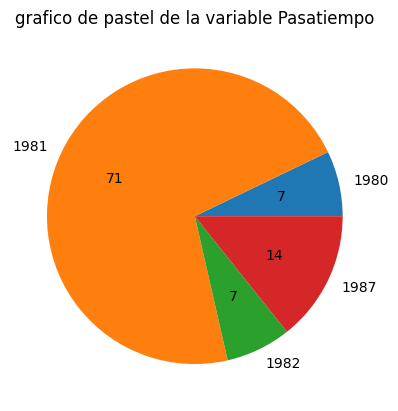

In [ ]:
conteo_empleados_anio.plot(kind='pie',autopct=lambda x: '{:.0f}'.format(x))
plt.title('grafico de pastel de la variable Pasatiempo')

In [ ]:
_=plt.legend(title='años', loc='best',bbox_to_anchor(1.4,0.85,0,0))

SyntaxError: positional argument follows keyword argument (<ipython-input-83-3f99d148b990>, line 1)